# Homework 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('../../Data/main/MNIST/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Question 1

#### Part A

Plotting the frequency of every digit in the dataset (their count).

In [3]:
digitCount = data['label'].value_counts()
print(digitCount.sort_index())

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: count, dtype: int64


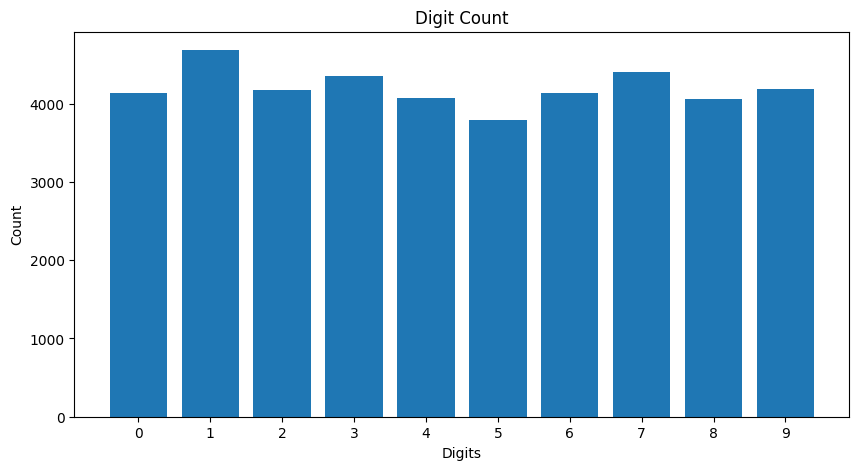

In [4]:
plt.figure(figsize=(10, 5))
plt.bar(digitCount.index, digitCount.values)
plt.xticks(np.arange(0, 10))
plt.xlabel('Digits')
plt.ylabel('Count')
plt.title('Digit Count')
plt.show()

#### Part B

Taking the average of the digits in the dataset, for each digit.

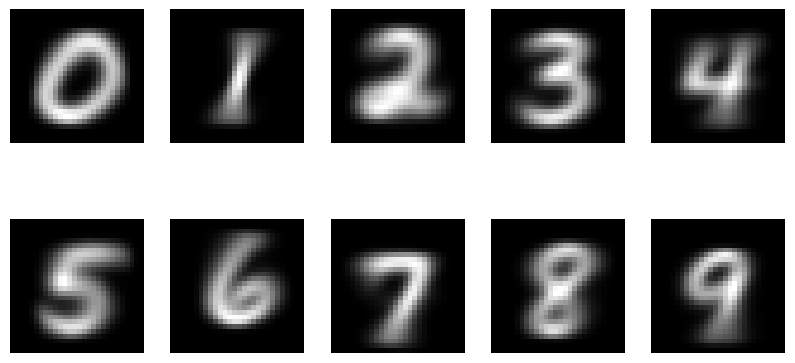

In [5]:
def viewImage(arr):
    return np.reshape(arr,[28,28])

labels = data.label
digits = np.array(data)
digits = digits[:,1:]

averages = []

for i in range(10):
    sumOfFives = np.zeros([28,28])
    count = 0

    for j in range(digits.shape[0]):
        if labels[j] == i:
            sumOfFives += viewImage(digits[j, :])
            count += 1

    avg = np.uint8(sumOfFives / count)
    averages.append(avg)

plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(averages[i], 'gray')
    plt.axis('off')

plt.show()

## Question 2

#### Part A

Dropping all data except for 0, 1, and 5.

In [6]:
filteredData = data[(data['label'] == 0) | 
                    (data['label'] == 1) | 
                    (data['label'] == 5)].reset_index(drop=True)
filteredData.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Part B

Clustering the data into 3 clusters using KMeans.

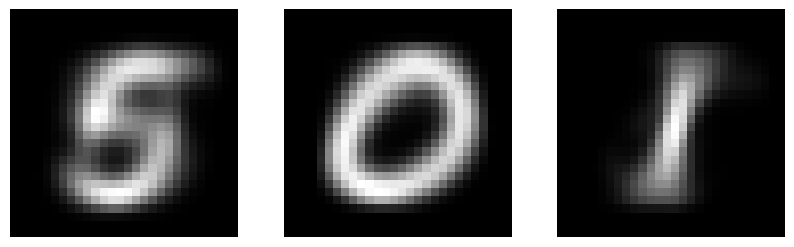

In [52]:
labels = filteredData["label"].values
digits = np.array(filteredData)
digits = digits[:, 1:]

kmeans = KMeans(3)
clusters = kmeans.fit(digits)

fig, axes = plt.subplots(1,3,figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(viewImage(kmeans.cluster_centers_[i]), 'gray')
    ax.axis("off")

plt.show()

#### Part C

Displaying some images of each cluster. 

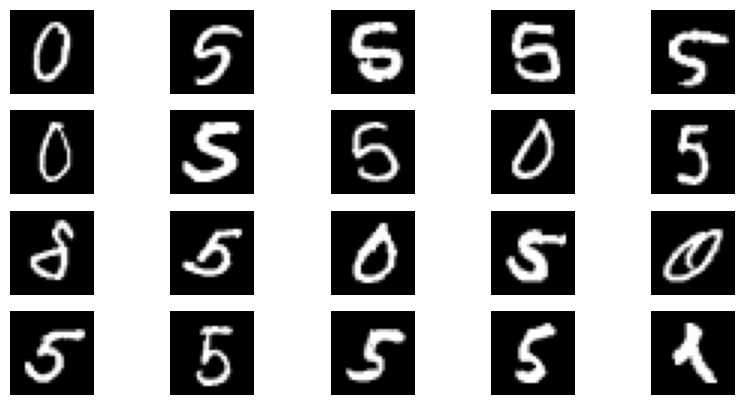

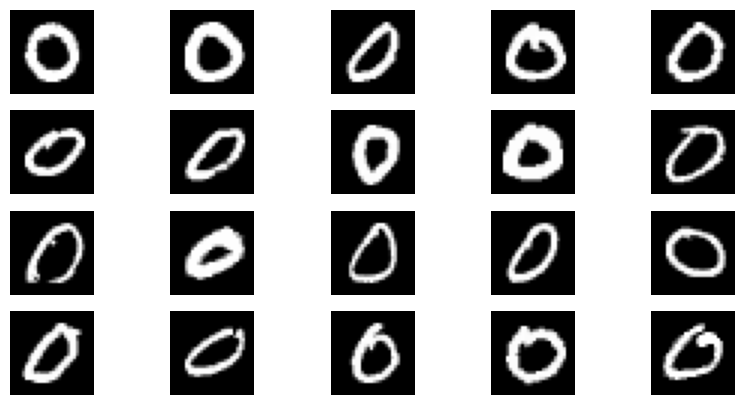

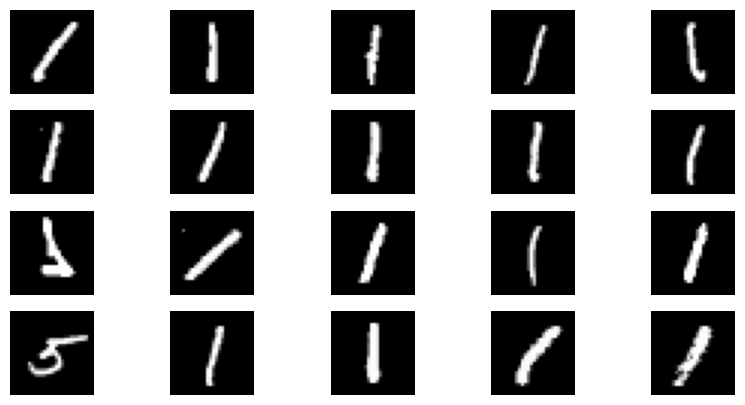

In [53]:
def plotCluster(id):
    count = 0
    fig = plt.figure(figsize=(10, 5))

    columns = 5
    rows = 4
    for row in range(digits.shape[0]):
        if kmeans.labels_[row] == id:
            count += 1
            pic = viewImage(digits[row, :])
            fig.add_subplot(rows, columns, count)
            plt.imshow(pic, 'gray')
            plt.axis('off')

        if count == rows * columns:
            break
    plt.show()

plotCluster(0)
plotCluster(1)
plotCluster(2)